Знакомство с нейронными сетями и Keras

1. Полносвязные сети (многослойный персептрон)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1)

In [3]:
df = df.dropna()

def Attrition_Flag(val):    
    if val == 'Existing Customer':
        return 0
    else:
        return 1

def Gender(val):    
    if val == 'M':
        return 0
    return 1

df['Attrition_Flag'] = df['Attrition_Flag'].apply(Attrition_Flag)
df['Gender'] = df['Gender'].apply(Gender)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,0,51,0,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,0,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,0,37,0,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,0,48,0,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
df['Education_Level'] = pd.Categorical(df['Education_Level'])
df['Marital_Status'] = pd.Categorical(df['Marital_Status'])
df['Income_Category'] = pd.Categorical(df['Income_Category'])
df['Card_Category'] = pd.Categorical(df['Card_Category'])
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].astype(np.int64)

In [5]:
for column in df.select_dtypes(include='category').columns:
    if column=='Card_Category':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Card_Category',axis=1), df['Card_Category'].cat.codes, test_size=0.2, random_state=42)

In [7]:
for column in df.select_dtypes(include='int64').columns:
    scale = StandardScaler().fit(X_train[[column]])
    X_train[[column]] = scale.transform(X_train[[column]])
    X_test[[column]] = scale.transform(X_test[[column]])

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=34, activation='relu'))
model.add(Dense(34, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
254/254 [==============================] - 1s 690us/step - loss: 0.6315 - accuracy: 0.7308
Epoch 2/30
254/254 [==============================] - 0s 686us/step - loss: 0.5295 - accuracy: 0.9352
Epoch 3/30
254/254 [==============================] - 0s 732us/step - loss: 0.4945 - accuracy: 0.9331
Epoch 4/30
254/254 [==============================] - 0s 678us/step - loss: 0.5005 - accuracy: 0.9273
Epoch 5/30
254/254 [==============================] - 0s 668us/step - loss: 0.4843 - accuracy: 0.9302
Epoch 6/30
254/254 [==============================] - 0s 698us/step - loss: 0.4686 - accuracy: 0.9328
Epoch 7/30
254/254 [==============================] - 0s 682us/step - loss: 0.4509 - accuracy: 0.9354
Epoch 8/30
254/254 [==============================] - 0s 678us/step - loss: 0.4534 - accuracy: 0.9370
Epoch 9/30
254/254 [==============================] - 0s 694us/step - loss: 0.4737 - accuracy: 0.9314
Epoch 10/30
254/254 [==============================] - 0s 682us/step - loss: 0.474

Пробовала разные варианты модели, но к сожалению предел точности практически не увеличился

In [15]:
prediction = model.predict(X_test) > 0.5

In [16]:
confusion_matrix(y_test, prediction)

array([[1879,    0,    0,    0],
       [  23,    0,    0,    0],
       [   5,    0,    0,    0],
       [ 119,    0,    0,    0]], dtype=int64)

In [17]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      1879\n           1       0.00      0.00      0.00        23\n           2       0.00      0.00      0.00         5\n           3       0.00      0.00      0.00       119\n\n    accuracy                           0.93      2026\n   macro avg       0.23      0.25      0.24      2026\nweighted avg       0.86      0.93      0.89      2026\n'

2. Сверточные сети

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [22]:
train_path = 'chest_xray/train/'
test_path = 'chest_xray/val/'

In [23]:
import matplotlib.pyplot as plt
import string
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, silhouette_samples, silhouette_score, accuracy_score
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, SimpleRNN, Flatten, Concatenate, GlobalAveragePooling2D, Lambda, ZeroPadding2D, SeparableConv2D, BatchNormalization, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from IPython.display import SVG
import matplotlib.image as mpimg

In [24]:
augs = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True)  

train_gen = augs.flow_from_directory(
    train_path,
    target_size = (128,128),
    batch_size=32,
    class_mode = 'binary',
    shuffle=True)

test_gen = augs.flow_from_directory(
    test_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)       

In [28]:
model.fit_generator(train_gen, steps_per_epoch = 32, validation_data = test_gen, validation_steps = 32, epochs = 30, verbose = 1)

Epoch 1/30
32/32 [==============================] - 31s 920ms/step - loss: 1.2225 - accuracy: 0.7362 - val_loss: 0.7440 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 29s 893ms/step - loss: 0.6557 - accuracy: 0.8521
Epoch 3/30
32/32 [==============================] - 29s 888ms/step - loss: 0.6592 - accuracy: 0.8721
Epoch 4/30
32/32 [==============================] - 29s 888ms/step - loss: 0.4028 - accuracy: 0.8998
Epoch 5/30
32/32 [==============================] - 28s 874ms/step - loss: 0.3428 - accuracy: 0.9346
Epoch 6/30
32/32 [==============================] - 29s 883ms/step - loss: 0.5927 - accuracy: 0.8928
Epoch 7/30
32/32 [==============================] - 29s 880ms/step - loss: 0.6605 - accuracy: 0.8621
Epoch 8/30
32/32 [==============================] - 28s 877ms/step - loss: 0.7830 - accuracy: 0.8632
Epoch 9/30
32/32 [==============================] - 28s 877ms/step - loss: 0.6297 - accuracy: 0.8753
Epoch 10/30
32/32 [==============================

In [59]:
model_score = model.evaluate_generator(test_gen, steps=32)

In [62]:

print("Accuracy:",model_score[1])

Accuracy: 0.5625


In [ ]:
Проверка на рисунке с теста
Возьмем снимок с пневмонией

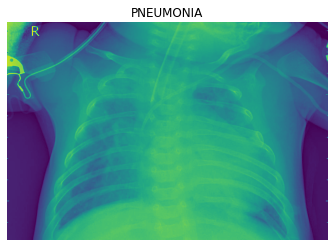

In [64]:
art = mpimg.imread('chest_xray/test/PNEUMONIA/person1_virus_6.jpeg')

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('PNEUMONIA')
plt.imshow(art)

In [75]:
test_gen = augs.flow_from_directory(
    test_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary')

Found 0 images belonging to 0 classes.


In [83]:
image = augs.flow_from_directory(
    'test/',
    target_size = (128,128))



Found 1 images belonging to 2 classes.


In [84]:
print(model.predict(image))

[[0.99770737]]


3. Рекуррентные сети

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [169]:
messages = pd.read_csv('spam.csv', encoding='latin-1', skipinitialspace=True, engine="python")
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages = messages.rename(columns={'v1': 'classColumn','v2': 'text'})

In [178]:
features = messages.drop('classColumn', axis=1)
targets = messages.drop('text', axis=1)

In [179]:
def classColumn(val):    
    if val == 'ham':
        return 0
    else:
        return 1

targets['classColumn'] = targets['classColumn'].apply(classColumn)
targets.head(10)

,classColumn
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [180]:
messages.text.str.len().max()

910

In [181]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(features.text.values.astype(str))

features_tokenized = tokenizer.texts_to_sequences(features.text.values.astype(str))
features_padded = pad_sequences(features_tokenized, maxlen=910)

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(features_padded, targets, test_size=0.2)

In [183]:
model = Sequential()
model.add(Embedding(10000, 64, input_length=910))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 910, 64)           640000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 910, 64)           8256      
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.fit(X_train, Y_train, batch_size=512, validation_data=(X_test, Y_test), epochs=5)

Epoch 1/5
9/9 [==============================] - 14s 1s/step - loss: 0.1802 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 12s 1s/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 12s 1s/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 13s 1s/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 13s 2s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000


In [190]:
prediction = model.predict(X_test) > 0.5

In [191]:
confusion_matrix(Y_test, prediction)

array([[1115]], dtype=int64)

In [192]:
classification_report(Y_test, prediction)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00      1115\n\n    accuracy                           1.00      1115\n   macro avg       1.00      1.00      1.00      1115\nweighted avg       1.00      1.00      1.00      1115\n'